<a href="https://colab.research.google.com/github/affogato-lab/datathon-braincells/blob/main/visitation_data_cleaning_and_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [19]:
pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.8/344.8 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/tmp/ipython-input-2563030789.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

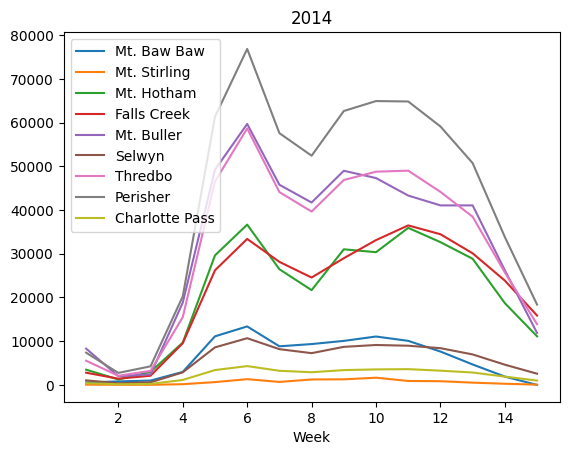

<Figure size 640x480 with 0 Axes>

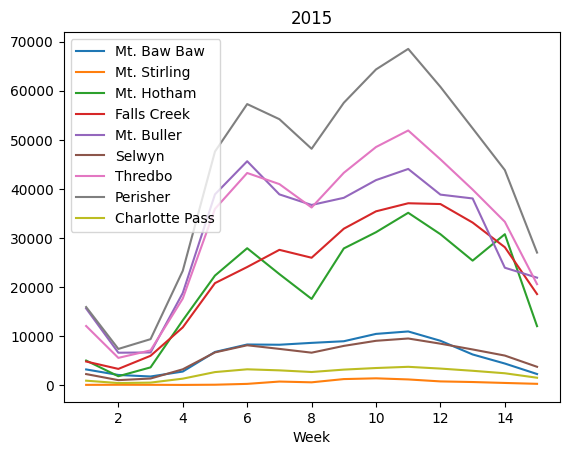

<Figure size 640x480 with 0 Axes>

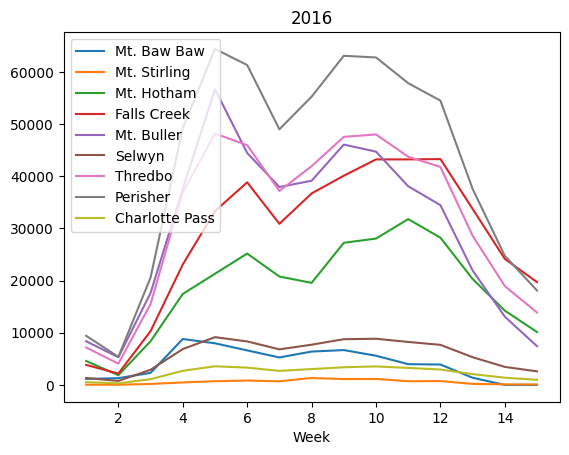

<Figure size 640x480 with 0 Axes>

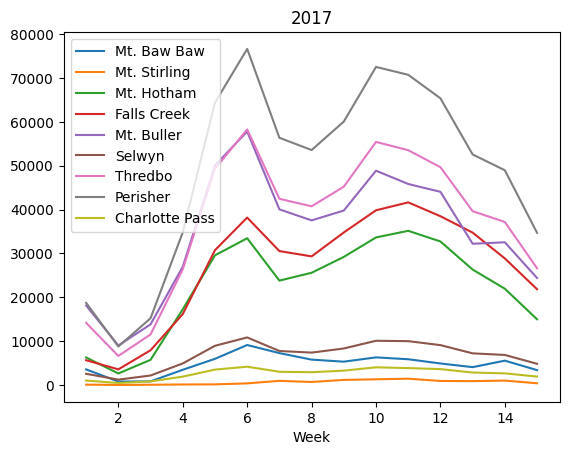

<Figure size 640x480 with 0 Axes>

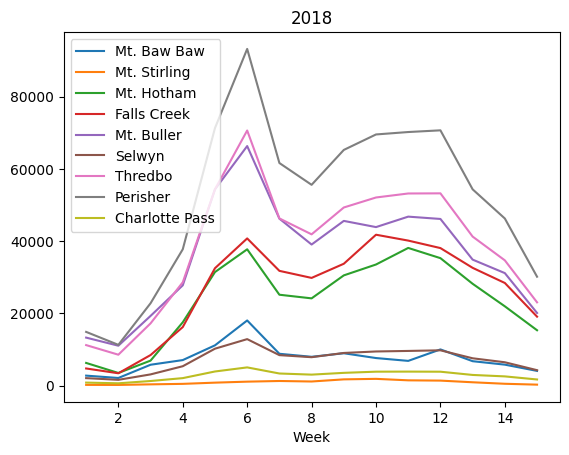

<Figure size 640x480 with 0 Axes>

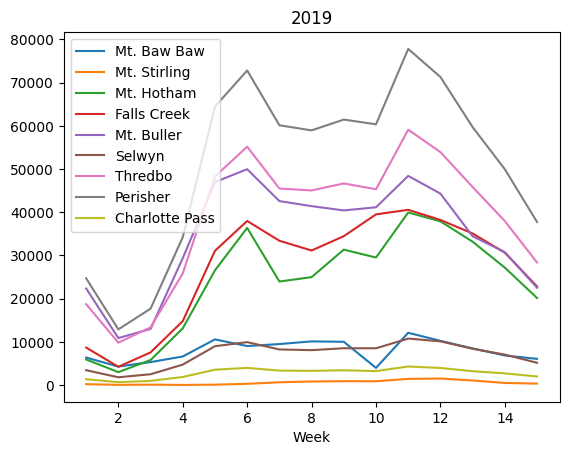

<Figure size 640x480 with 0 Axes>

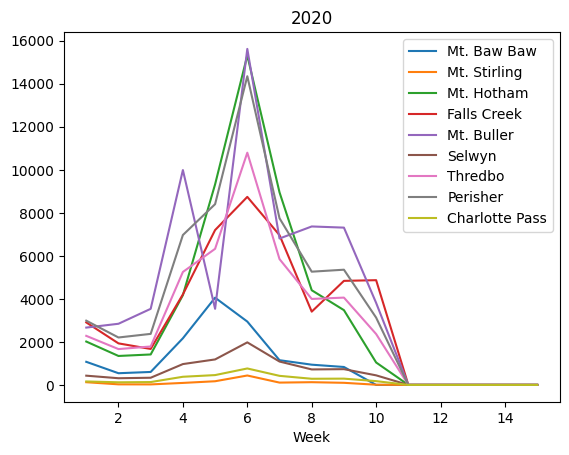

<Figure size 640x480 with 0 Axes>

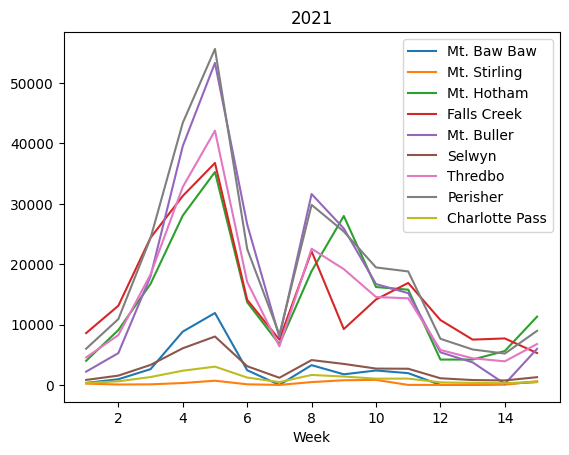

<Figure size 640x480 with 0 Axes>

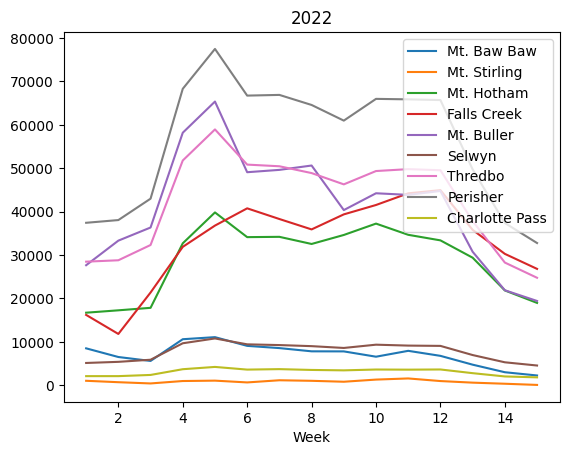

<Figure size 640x480 with 0 Axes>

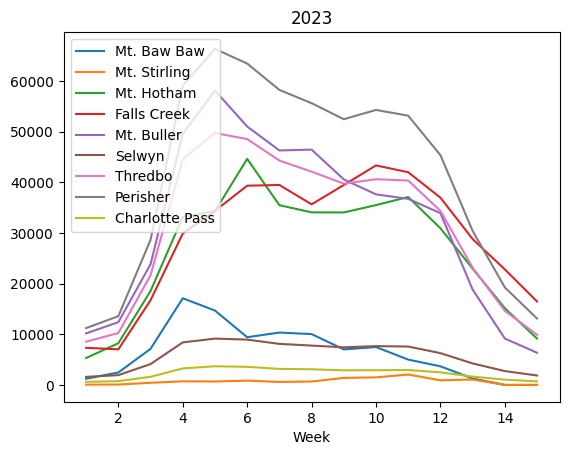

<Figure size 640x480 with 0 Axes>

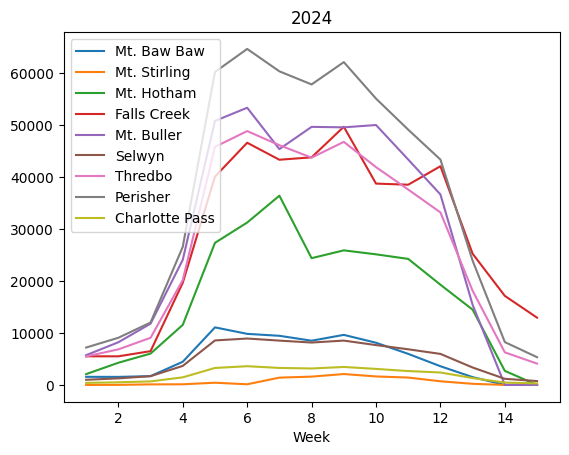

<Figure size 640x480 with 0 Axes>

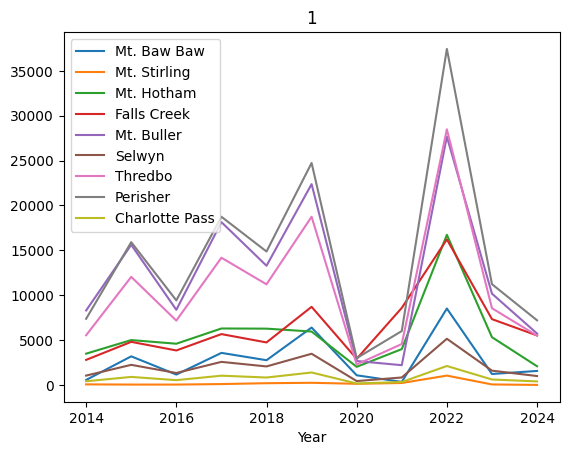

<Figure size 640x480 with 0 Axes>

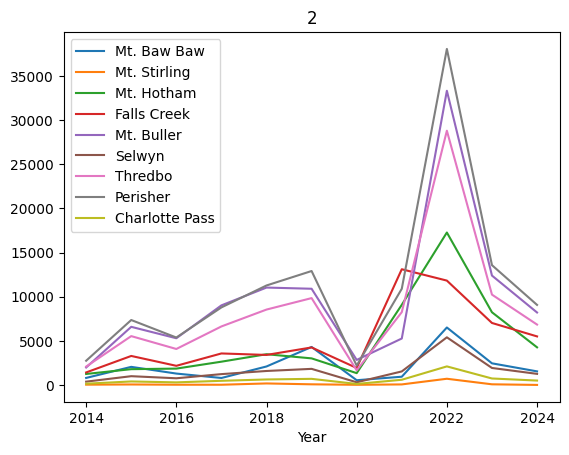

<Figure size 640x480 with 0 Axes>

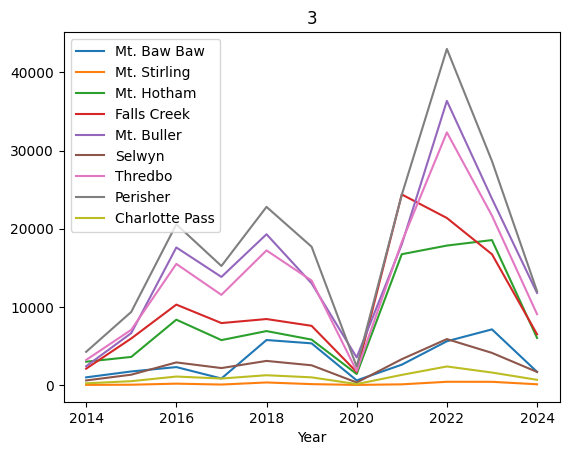

<Figure size 640x480 with 0 Axes>

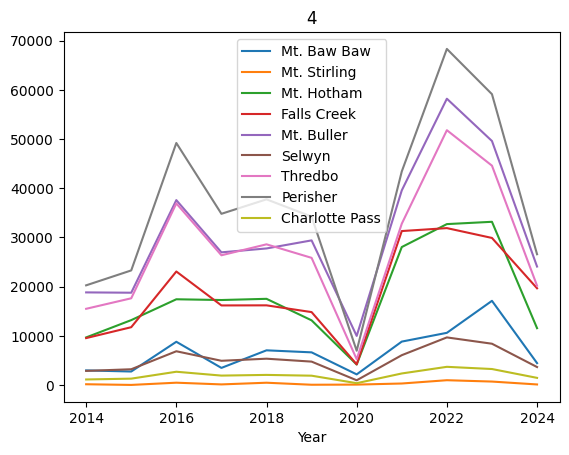

<Figure size 640x480 with 0 Axes>

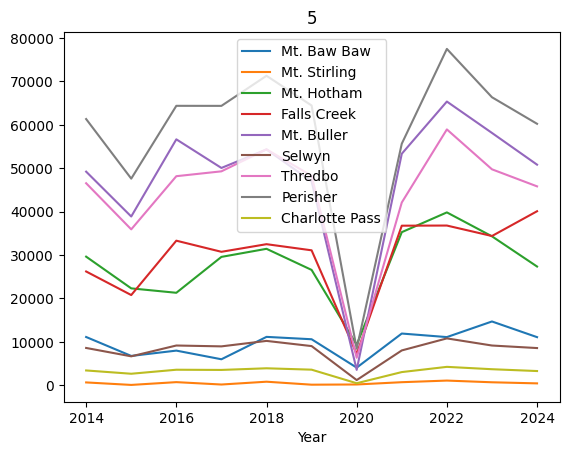

<Figure size 640x480 with 0 Axes>

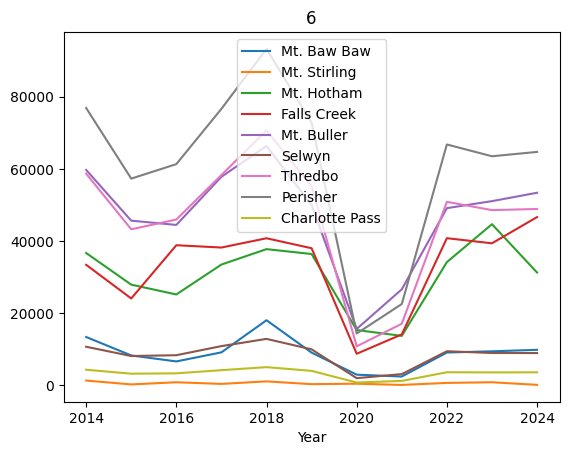

<Figure size 640x480 with 0 Axes>

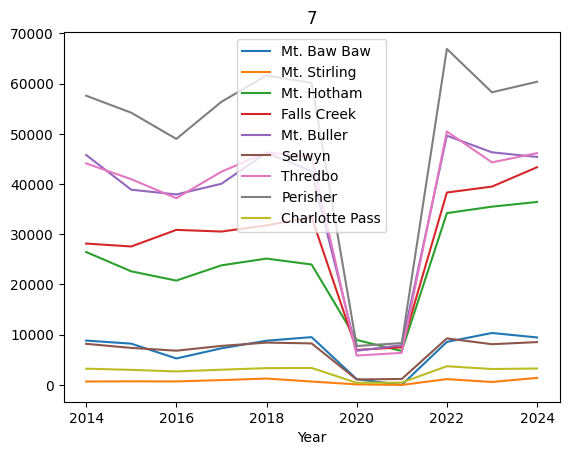

<Figure size 640x480 with 0 Axes>

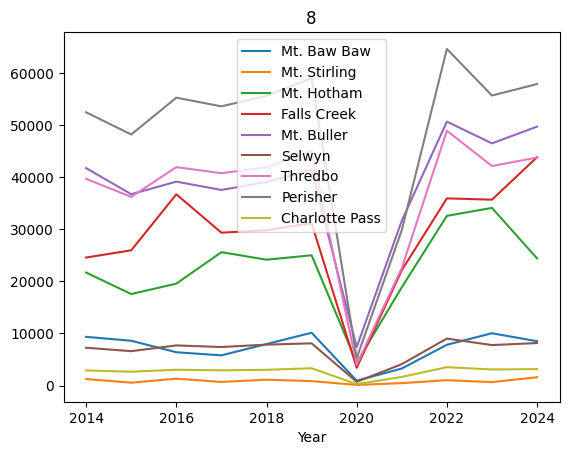

<Figure size 640x480 with 0 Axes>

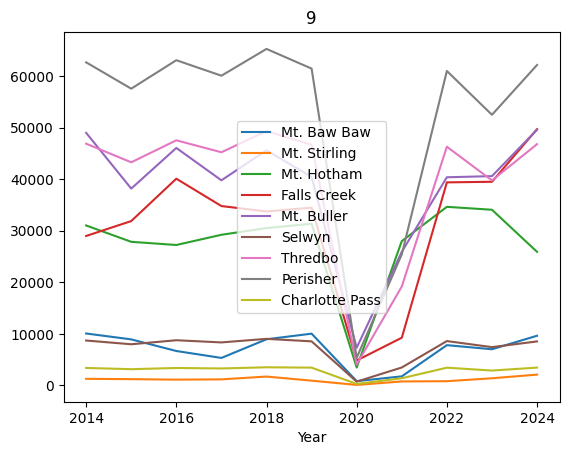

<Figure size 640x480 with 0 Axes>

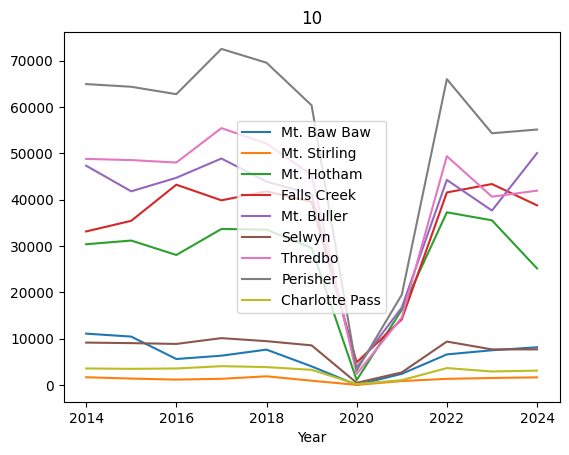

<Figure size 640x480 with 0 Axes>

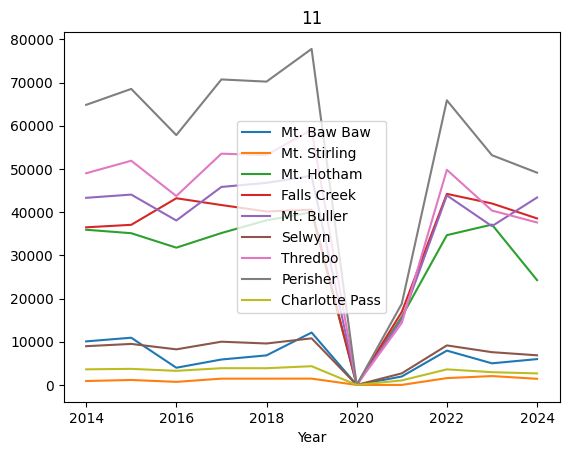

<Figure size 640x480 with 0 Axes>

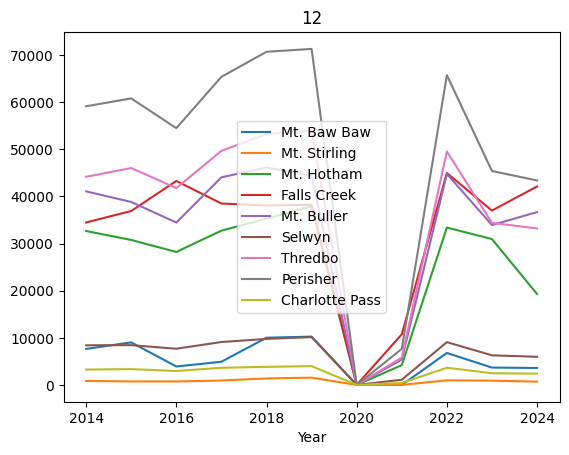

<Figure size 640x480 with 0 Axes>

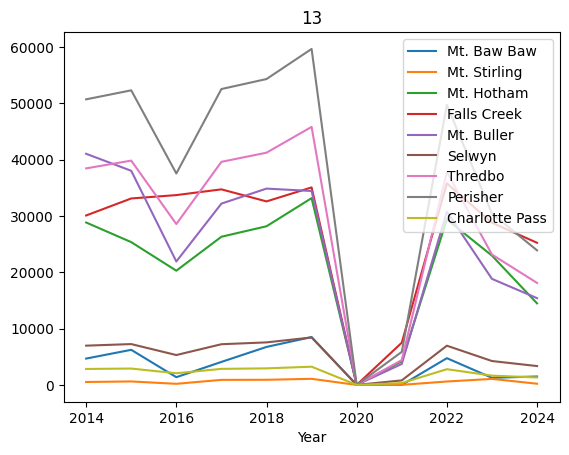

<Figure size 640x480 with 0 Axes>

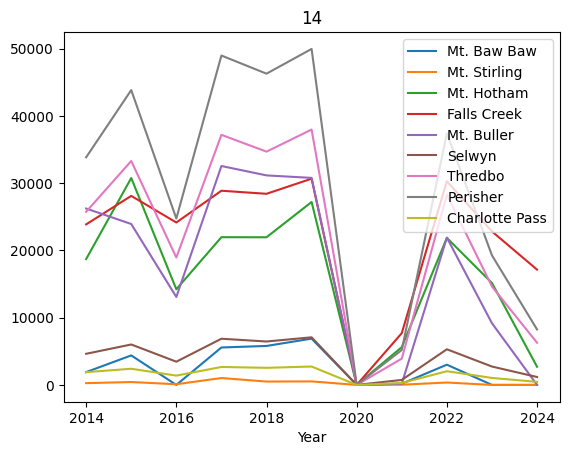

<Figure size 640x480 with 0 Axes>

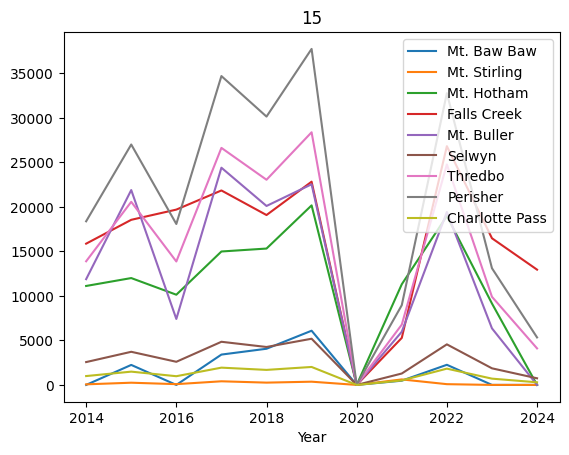

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

visitation = pd.read_excel("/content/visitation_data_original.xlsx")

weeks = np.arange(15)+1
years= np.arange(2014,2025,1)
resorts = list(visitation.columns)[2:]
visitation_years=[]
visitation_weeks=[]

for i in range(len(years)):
    plt.figure()
    visitation_years.append(visitation[visitation['Year']==years[i]])
    visitation_years[i].plot(x='Week',y=resorts[:],title=years[i])

for i in range(len(weeks)):
    plt.figure()
    visitation_weeks.append(visitation[visitation['Week']==weeks[i]])
    visitation_weeks[i].plot(x='Year',y=resorts[:],title=weeks[i])

#plotting and extracting visitation data by week and year, for each resort/.


In [16]:
#linearly interpolating covid years

replacement_row = [np.nan]*len(resorts)
for i in range(len(weeks)):
  #replace covid year values with nan
  visitation_weeks[i].loc[visitation_weeks[i]['Year'].isin([2020,2021]),resorts] = replacement_row
  #linearly interpolate NaN Value
  visitation_weeks[i].interpolate('linear',inplace=True)
  visitation_weeks[i]['Year'] = visitation_weeks[i]['Year'].astype(int)



/tmp/ipython-input-1419083353.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitation_weeks[i].interpolate('linear',inplace=True)
/tmp/ipython-input-1419083353.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitation_weeks[i]['Year'] = visitation_weeks[i]['Year'].astype(int)
/tmp/ipython-input-1419083353.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitation_

In [20]:
#forecasting week-based visitation

from darts import TimeSeries
from darts.models import ExponentialSmoothing

predicted_visitations = np.zeros((len(weeks),len(resorts)))

for i in range(len(weeks)):
  for j in range(len(resorts)):
    series = TimeSeries.from_dataframe(visitation_weeks[i],'Year',resorts[j])
    train, val = series[:-1], series[-1]
    model = ExponentialSmoothing(trend=None, seasonal=None,seasonal_periods=None)
    model.fit(train)
    prediction = model.predict(1, num_samples=1000,random_state=42)
    predicted_visitations[i,j] = prediction.values().item()

predicted_visitations_df = pd.DataFrame(predicted_visitations, index=weeks,columns=resorts)



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


     Mt. Baw Baw  Mt. Stirling    Mt. Hotham   Falls Creek    Mt. Buller  \
1    5707.035592    623.885482  11770.730913  10767.991205  22653.588452   
2    3371.674861    434.820744  10400.079035   8510.285306  22531.221162   
3    7585.083824    465.049475  20130.619507  18702.111498  30064.804533   
4   16836.639525    885.310153  35517.240501  32901.587494  55445.940563   
5   14058.829586    722.687257  38126.043800  37040.072552  62302.939602   
6   11822.284292    851.959937  40384.975390  42209.486477  55902.935878   
7    9951.232653    978.617299  36936.069332  40369.841165  49004.339853   
8    9170.220664   1074.424555  35672.370113  37102.940130  48183.536373   
9    9079.152964   1287.610717  34865.110642  41092.357986  43918.046860   
10   8383.637785   1479.057830  36746.431276  44554.816380  45165.310779   
11   9746.677784   2023.750110  38365.497921  43714.330583  45933.981440   
12   8608.314205   1014.694605  32266.208828  41199.222129  44014.986781   
13   6343.14

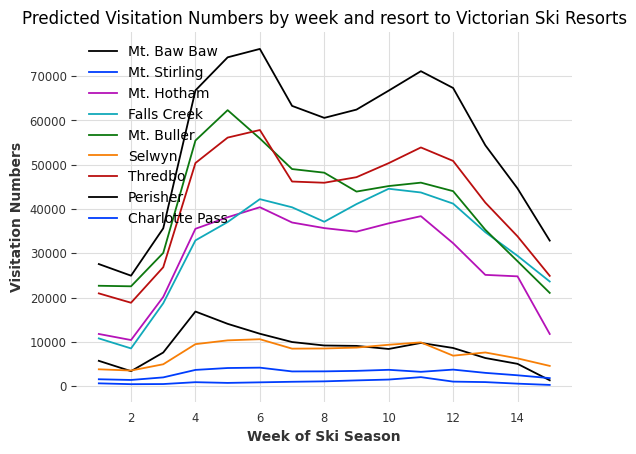

In [26]:
print(predicted_visitations_df)
predicted_visitations_df.to_excel('/predicted_visitations.xlsx')

plt.figure()
plt.plot(predicted_visitations_df,label=resorts)
plt.legend()
plt.title('Predicted Visitation Numbers by week and resort to Victorian Ski Resorts')
plt.xlabel('Week of Ski Season')
plt.ylabel('Visitation Numbers')
areas = np.array([350000,600000,3200000,4500000,	3000000,450000,4800000,12450000,500000])

print(predicted_visitations/areas)
print(np.amax(predicted_visitations/areas))
print(np.amin(predicted_visitations/areas))


In [86]:
#Computing Score for each resort/week pair

def meanTempScore(x):
  score = -5e-05*x**4 - 0.0027*x**3 - 0.0421*x**2 - 0.1524*x + 0.9099
  return score

def precipScore(x):
  score = -3e-12*x**5 + 2e-09*x**4 - 5e-07*x**3 + 1e-05*x**2 + 0.0101*x + 0.0042
  return score

def reviewScore(x):
  score = x**2/(25)
  return score

def priceScore(x):
  score = -0.0012*x + 1.2206
  return score

def distScore(x):
  score = -0.0023*x + 1.4032
  return score

def visitScore(x):
  score = -10.491*x + 1.0047
  return score

def Score(week,resort,temp_fc,precip_fc,reviews_fc,price,dist,visits):

  Tmean = meanTempScore(temp_fc[week])
  #print("t mean = "+str(Tmean))

  precip = precipScore(precip_fc[week])
  #print("precip = " +str(precip))

  review = reviewScore(reviews_fc[week,resort])
  #print("review = "+str(review))
  price = priceScore(price[resort])
  #print("price = "+str(price))
  dist = distScore(dist[resort])
  #print("dist = "+str(dist))
  areas = np.array([350000,600000,3200000,4500000,3000000,450000,4800000,12450000,500000])
  visit = visitScore(visits[week,resort]/areas[resort])
  #print("visit = "+str(visit))
  a = 1/6 #weightings
  score = 0.2*Tmean+0.2*precip+0.25*review+0.15*price+0.05*dist+0.15*visit
  return score




In [88]:
#computing scores

precip_fc = pd.read_csv("/content/rainfall_15weeks_forecast.csv").to_numpy()[:,1]
print(precip_fc)
#temp_fc = pd.read_csv("/content/temperature_15weeks_forecast.csv").to_numpy()[:,1]
temp_fc = [1.88122268230964,
1.18032827377019,
-0.0990896147042328,
-0.689739229024944,
-0.376490414347557,
-0.145607500246476,
0.117020050773934,
-0.859366373360938,
0.433369518019973,
0.981142467676761,
0.40758838109712,
1.3563235755295,
2.4859641108216300,
2.24014318891509,
2.1027187263794400,
3.58486252834467]
reviews_fc = pd.read_csv("/content/predicted_rating.csv").to_numpy()[:,1:]

pd_data = pd.read_csv("/content/Price and Distance Data.csv").to_numpy()[:,1:]
price = pd_data[0,:]
dist = pd_data[1,:]
visits = predicted_visitations

scores = np.zeros((len(weeks),len(resorts)))
for i in range(len(weeks)):
  for j in range(len(resorts)):
    score = Score(i,j,temp_fc,precip_fc,reviews_fc,price,dist,visits)
    scores[i,j] = score

weeks_name = ['week 1','week 2','week 3','week 4','week 5','week 6','week 7','week 8','week 9','week 10','week 11','week 12','week 13','week 14','week 15']
scores_df=pd.DataFrame(scores,columns=resorts,index=weeks_name)
print(scores_df.stack().idxmax())
scores_df.style.background_gradient(cmap ='plasma')\
        .set_properties(**{'font-size': '20px'})

[128.3 257.8 171.3 341.2 250.  123.3 273.6 112.8 241.7 162.4 113.2 237.6
 206.6 202.6 203.6]
('week 8', 'Mt. Stirling')


,Mt. Baw Baw,Mt. Stirling,Mt. Hotham,Falls Creek,Mt. Buller,Selwyn,Thredbo,Perisher,Charlotte Pass
week 1,0.724681,0.786089,0.602914,0.634684,0.733435,0.584666,0.638166,0.555284,0.623480
week 2,0.632911,0.682902,0.502497,0.533204,0.634350,0.489189,0.537458,0.462588,0.512648
week 3,0.792106,0.858695,0.663904,0.709272,0.808344,0.642333,0.718788,0.635662,0.702704
week 4,0.207833,0.333541,0.131751,0.163208,0.251226,0.150374,0.165720,0.089794,0.148335
week 5,0.654574,0.771454,0.565619,0.595368,0.675431,0.536928,0.600243,0.529106,0.583867
week 6,0.783329,0.878805,0.681660,0.716712,0.798267,0.707561,0.721755,0.646190,0.705217
week 7,0.598376,0.675323,0.487187,0.515944,0.614303,0.503833,0.524057,0.417919,0.506953
week 8,0.813619,0.901713,0.699540,0.728818,0.826465,0.709816,0.735879,0.629992,0.718628
week 9,0.676373,0.754468,0.565121,0.587604,0.690411,0.582289,0.602053,0.484348,0.584309
week 10,0.755637,0.829801,0.622862,0.664530,0.766411,0.627242,0.674944,0.602739,0.657992
